Model : https://github.com/pysentimiento/pysentimiento

Dataset : https://huggingface.co/datasets/tweet_eval

In [2]:
!pip install pysentimiento

# Dataset

In [3]:
from datasets import load_dataset

/Users/choeuhyeon/miniconda3/envs/nlp/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
ds = load_dataset('tweet_eval', 'sentiment')

Found cached dataset tweet_eval (/Users/choeuhyeon/.cache/huggingface/datasets/tweet_eval/sentiment/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)
100%|██████████| 3/3 [00:00<00:00, 134.07it/s]


In [5]:
ds['train']['text'][0:3]

['"QT @user In the original draft of the 7th book, Remus Lupin survived the Battle of Hogwarts. #HappyBirthdayRemusLupin"',
 '"Ben Smith / Smith (concussion) remains out of the lineup Thursday, Curtis #NHL #SJ"',
 'Sorry bout the stream last night I crashed out but will be on tonight for sure. Then back to Minecraft in pc tomorrow night.']

In [6]:
ds['train']['label'][0:3]

[2, 1, 1]

In [7]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 45615
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 12284
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

# Model

In [8]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("pysentimiento/robertuito-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("pysentimiento/robertuito-sentiment-analysis")

# Preprocess and Analyze

In [9]:
%cd /Users/choeuhyeon/Desktop/CMU/NLP/Project/pysentimiento

/Users/choeuhyeon/Desktop/CMU/NLP/Project/pysentimiento


In [10]:
ds['train']['label'][0]

2

In [7]:
from pysentimiento.preprocessing import preprocess_tweet
preprocess_tweet(ds['train']['text'][0])

'"QT @usuario In the original draft of the 7th book, Remus Lupin survived the Battle of Hogwarts. happy birthday remus lupin"'

In [8]:
for i in range(5):
    t = ds['train']['text'][i]
    print('Result of '+str(i) +'\n')
    print(t+'\n')
    print(preprocess_tweet(t))

Result of 0

"QT @user In the original draft of the 7th book, Remus Lupin survived the Battle of Hogwarts. #HappyBirthdayRemusLupin"

"QT @usuario In the original draft of the 7th book, Remus Lupin survived the Battle of Hogwarts. happy birthday remus lupin"
Result of 1

"Ben Smith / Smith (concussion) remains out of the lineup Thursday, Curtis #NHL #SJ"

"Ben Smith / Smith (concussion) remains out of the lineup Thursday, Curtis nhl sj"
Result of 2

Sorry bout the stream last night I crashed out but will be on tonight for sure. Then back to Minecraft in pc tomorrow night.

Sorry bout the stream last night I crashed out but will be on tonight for sure. Then back to Minecraft in pc tomorrow night.
Result of 3

Chase Headley's RBI double in the 8th inning off David Price snapped a Yankees streak of 33 consecutive scoreless innings against Blue Jays

Chase Headley's RBI double in the 8th inning off David Price snapped a Yankees streak of 33 consecutive scoreless innings against Blue Jays
R

In [11]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="en")

In [19]:
ds['train']['label'][0]

2

In [20]:
analyzer.predict(ds['train']['text'][0]).output

'POS'

In [13]:
import torch
import torch.nn.functional as F
from sklearn import metrics

In [14]:
from tqdm import tqdm
sent_dict = {'POS':2, 'NEU':1, 'NEG':0}

In [15]:
n = 12284
y_preds = []
y_trues = []

for i in tqdm(range(n)):
    t = ds['test']['text'][i]
    l = ds['test']['label'][i]
    y_pred = analyzer.predict(t)
    y_true = l
    y_preds.append(sent_dict[y_pred.output])
    y_trues.append(y_true)


100%|██████████| 12284/12284 [27:41<00:00,  7.39it/s] 


In [16]:
len(y_preds) == len(y_trues)

True

In [30]:
y_trues

[1,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 2,
 0,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 2,


In [33]:
confusion_matrix = metrics.confusion_matrix(y_trues, y_preds)
print(confusion_matrix/np.sum(confusion_matrix, 1))

[[3274  657   41]
 [1499 3822  616]
 [  99  664 1612]]


In [28]:
np.sum(confusion_matrix, 1)

array([3972, 5937, 2375])

In [44]:
confusion_matrix[0][0]

3274

In [42]:
cm = np.zeros((3, 3))

In [45]:
import numpy as np

In [50]:
cm

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [51]:
for i in range(3):
    s = np.sum(confusion_matrix[i])
    for j in range(3):
        cm[i][j] = confusion_matrix[i][j]/s

In [52]:
cm

array([[0.82426989, 0.16540785, 0.01032226],
       [0.25248442, 0.64375947, 0.10375611],
       [0.04168421, 0.27957895, 0.67873684]])

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_trues, y_preds))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74      3972
           1       0.74      0.64      0.69      5937
           2       0.71      0.68      0.69      2375

    accuracy                           0.71     12284
   macro avg       0.71      0.72      0.71     12284
weighted avg       0.71      0.71      0.71     12284



In [24]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot: >

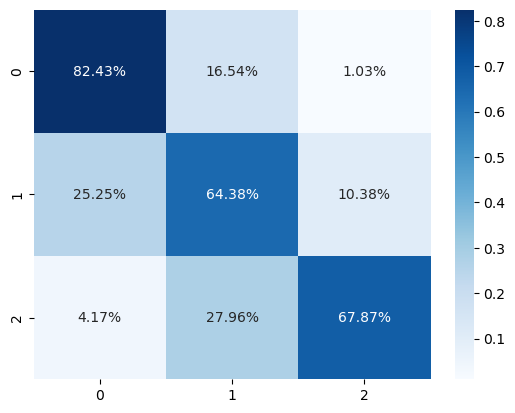

In [54]:
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='.2%', cmap='Blues') #annot=True to annotate cells

<AxesSubplot: >

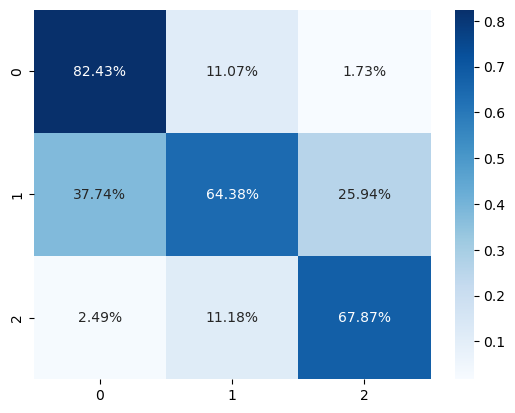

In [25]:
ax = plt.subplot()
sns.heatmap(confusion_matrix/np.sum(confusion_matrix, 1), annot=True, ax=ax, fmt='.2%', cmap='Blues') #annot=True to annotate cells